# Explore here

In [83]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Selecting my features:

In [84]:
X = df[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


#### Split the data into train set and test set

In [85]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [86]:
X.shape

(20640, 3)

In [87]:
X_train.shape

(16512, 3)

In [88]:
X_test.shape

(4128, 3)

In [89]:
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


I'll be using the elbow method to find the best K:

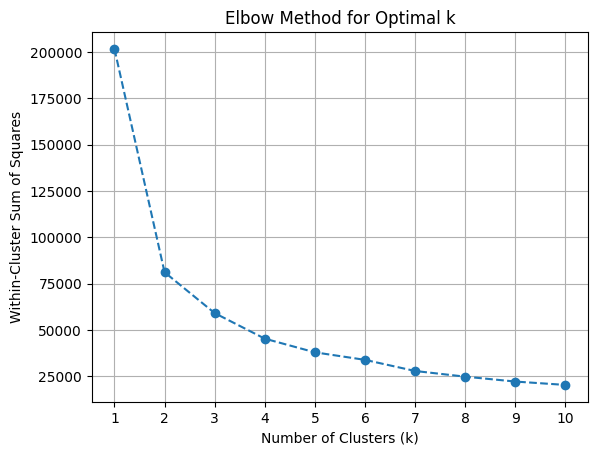

In [90]:
SSE = []
for k in range(1, 20):
    kmeans = KMeans(n_jobs= -1, n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    SSE.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 20), SSE, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

The best k would be between 4 and 6

Initialize the model and training the model

In [188]:
model = KMeans(n_clusters=6, random_state=42)

model.fit(X_train)


KMeans(n_clusters=6, random_state=42)

Clustering and assigning to the dataset as a new column "Cluster":

In [190]:
y_train = list(model.labels_)
X_train["Cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,1
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,2


See the number of data points assigned to each cluster (by index);

In [191]:
X_train['Cluster'].value_counts()

Cluster
2    5002
1    3720
3    3233
5    2440
0    1836
4     281
Name: count, dtype: int64

### Evaluating the separation between clusters. 
Silhouette score is a good alternative to measure how similar an object is to its own cluster compared to the other clusters

In [200]:
from sklearn.metrics import silhouette_score
# Calculate silhouette score
silhouette_avg = silhouette_score(X_train, X_train['Cluster'])

print("The average silhouette score is:", silhouette_avg)


The average silhouette score is: 0.5175150379242239


Since the silhouette score ranges from -1 to 1, we can observe that the clusters are reasonablly well-separated with a score of approximately 0.52

### Plotting

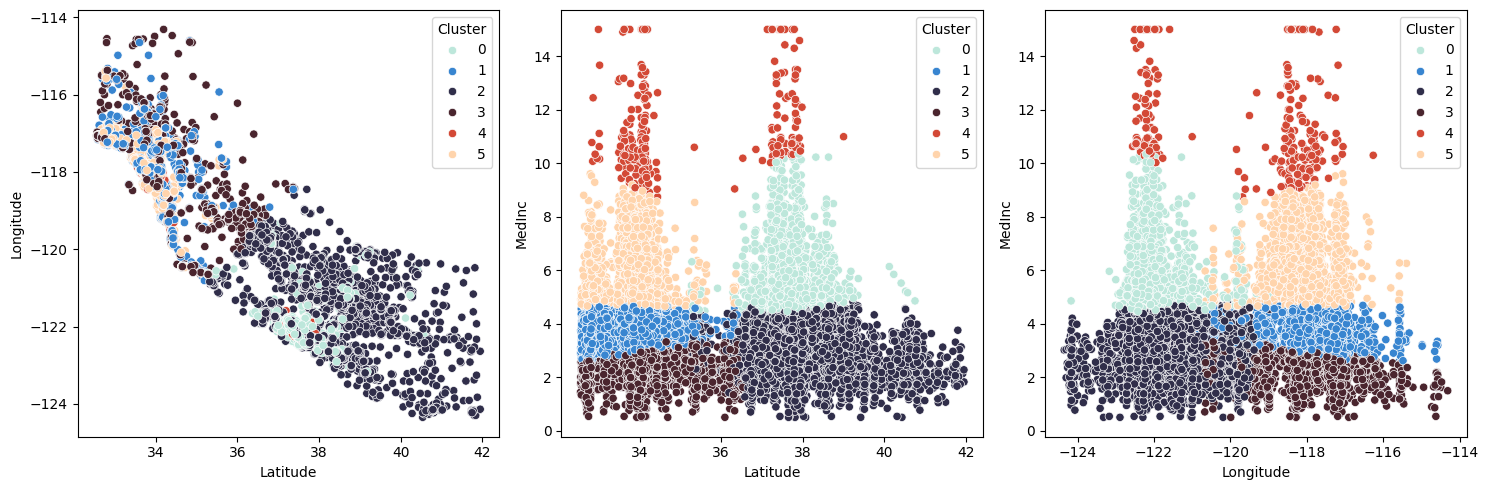

In [193]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "icefire")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "icefire")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "icefire")
plt.tight_layout()

plt.show()

### Predicting and plotting it

In [194]:
y_test = list(model.predict(X_test))
X_test['Cluster'] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,2
20484,5.7376,34.28,-118.72,5
9814,3.7250,36.62,-121.93,2


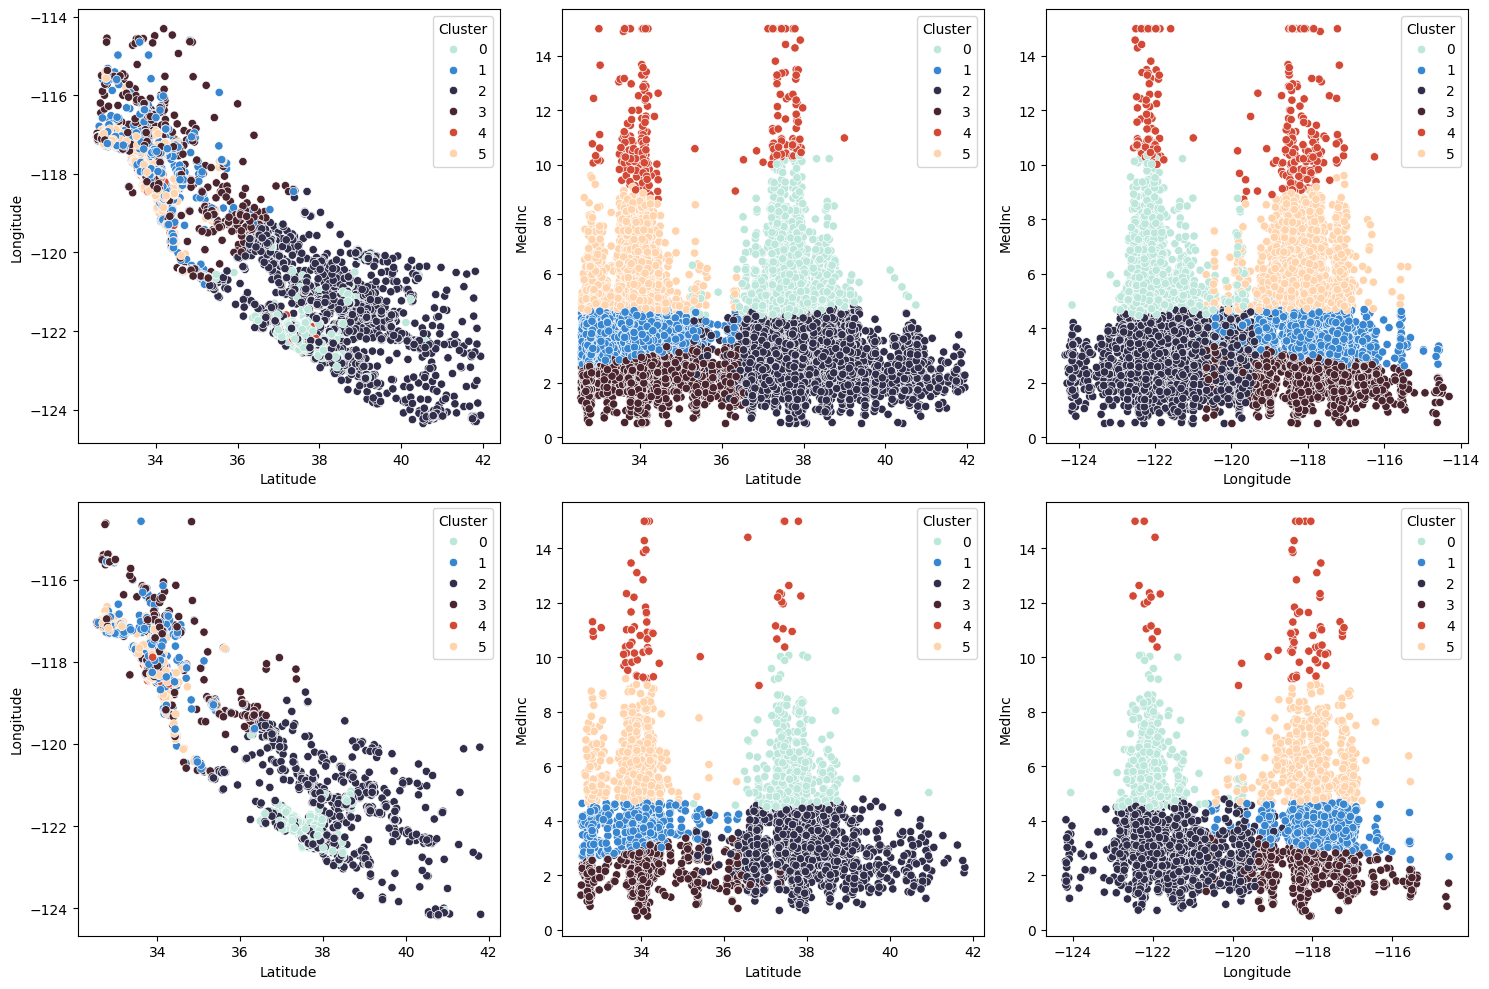

In [195]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.scatterplot(ax = axis[0][0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "icefire")
sns.scatterplot(ax = axis[0][1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "icefire")
sns.scatterplot(ax = axis[0][2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "icefire")
plt.tight_layout()

sns.scatterplot(ax = axis[1][0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "icefire")
sns.scatterplot(ax = axis[1][1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "icefire")
sns.scatterplot(ax = axis[1][2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "icefire")
plt.tight_layout()

plt.show()

### Train a supervised classification model

This target will be a categorical target (median income), so I'll use decision tree model for this. Decision tree makes it easier to understand the decision-making process of the model and how different features contribute to the final prediction, unlike K-means that doesn't provide a clear explanation of how it groups data points. It simply assigns data points to clusters based on their proximity in a multidimensional space.

In [196]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier( random_state=42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

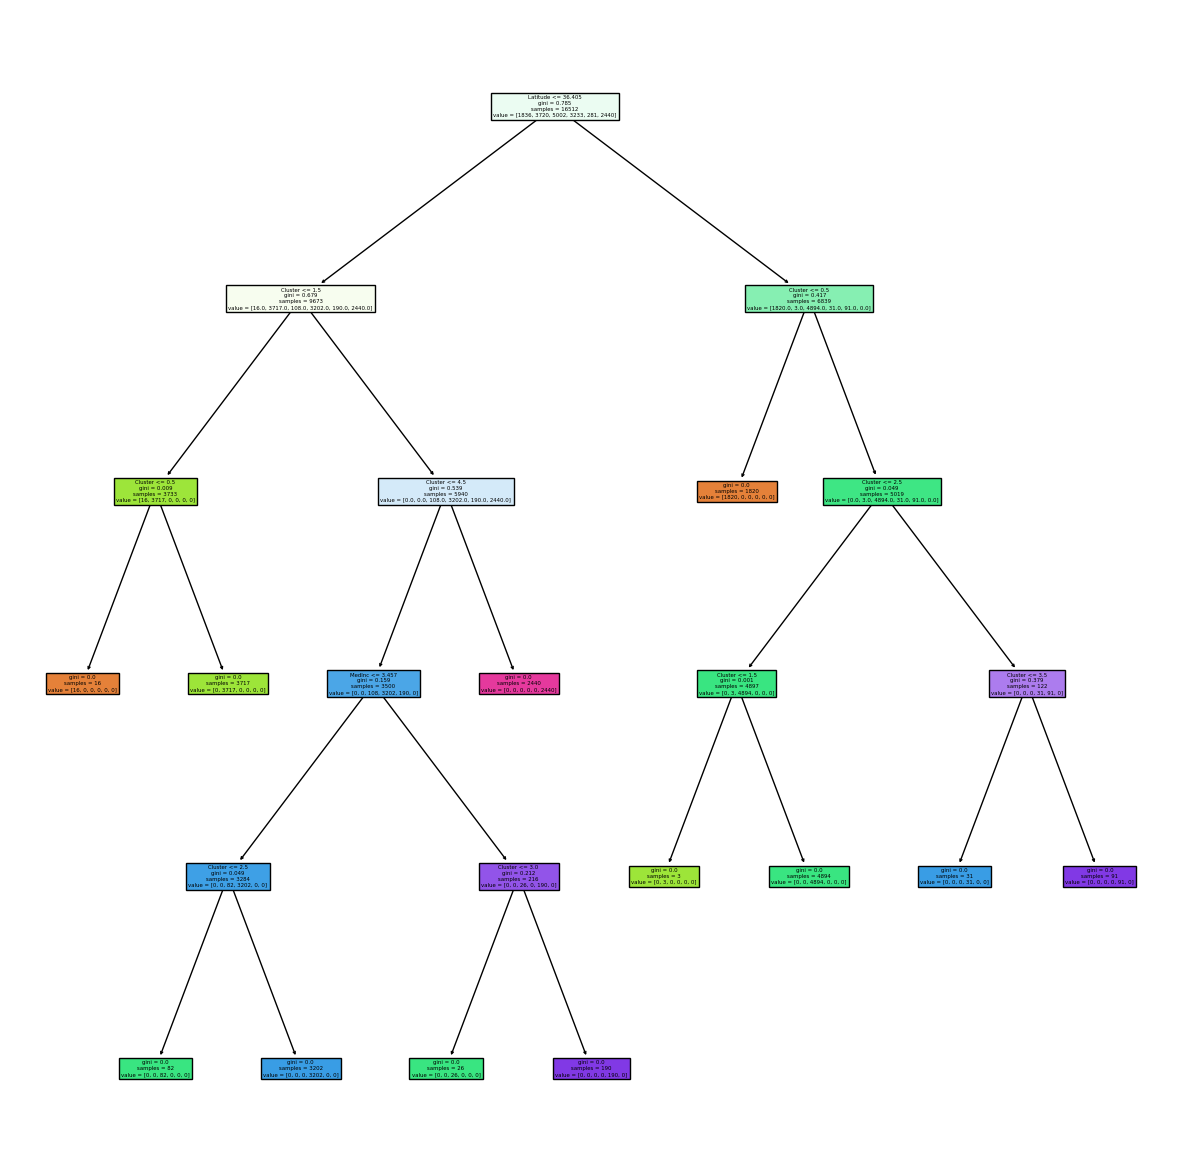

In [197]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_tree, feature_names = list(X_train.columns), filled = True)

plt.show()

In [198]:
y_pred = model_tree.predict(X_test)

In [199]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0
